In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-beta0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.0
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()


In [3]:
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [4]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_valid_std = std.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_train_std = std.transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()

In [6]:
def show_images(n_rows,n_cols,x_data,y_data,classnames):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i*n_cols + j
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(classnames[y_data[index]])
    plt.show()
classnames = ['T-shirt','Trouser','pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层 full connect layer
model.add(keras.layers.Dense(300,activation="relu"))
# 全连接层 full connect layer
model.add(keras.layers.Dense(100,activation="relu"))
# 输出层 outputlayer,多分类采用softmax函数
model.add(keras.layers.Dense(10,activation="softmax"))
# relu； y = max(0,x)
# softmax: 将向量转换为概率分布
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
# 创建保存模型路径
logdir = '.\callbacks'
if not os.path.exists(logdir):
        os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "\\fashion_mnist_model.h5")
callbacks = [keras.callbacks.TensorBoard(logdir),
             keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
             keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),]

history = model.fit(x_train_std,y_train,epochs=100,
                    validation_data=(x_valid_std,y_valid),
                    callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2349 - accuracy: 0.9143 - val_loss: 0.3006 - val_accuracy: 0.8910
Epoch 2/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2262 - accuracy: 0.9177 - val_loss: 0.3093 - val_accuracy: 0.8928
Epoch 3/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2186 - accuracy: 0.9211 - val_loss: 0.2948 - val_accuracy: 0.8944
Epoch 4/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2102 - accuracy: 0.9236 - val_loss: 0.3014 - val_accuracy: 0.8934
Epoch 5/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2024 - accuracy: 0.9260 - val_loss: 0.2942 - val_accuracy: 0.8974
Epoch 6/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.1954 - accuracy: 0.9300 - val_loss: 0.3085 - val_accuracy: 0.8908
Epoch 7/100
55000/55000 [==========================

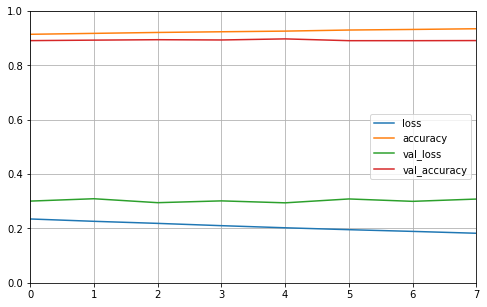

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [11]:
model.evaluate(x_test,y_test)



10000/10000 [==============================] - 0s 22us/sample - loss: 4.0667 - accuracy: 0.7378


[4.066664846038818, 0.7378]

In [12]:
logdir = './callbacks'
if not os.path.exists(logdir):
        os.mkdir(logdir)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 1s 10us/sample - loss: 13.2023 - accuracy: 0.1702 - val_loss: 11.8452 - val_accuracy: 0.2600
Epoch 2/10
55000/55000 [==============================] - 0s 7us/sample - loss: 11.9930 - accuracy: 0.2523 - val_loss: 12.5713 - val_accuracy: 0.2178
Epoch 3/10
55000/55000 [==============================] - 0s 7us/sample - loss: 12.3769 - accuracy: 0.2303 - val_loss: 11.5989 - val_accuracy: 0.2778
Epoch 4/10
55000/55000 [==============================] - 0s 7us/sample - loss: 11.6567 - accuracy: 0.2746 - val_loss: 11.3418 - val_accuracy: 0.2944
Epoch 5/10
55000/55000 [==============================] - 0s 7us/sample - loss: 11.5460 - accuracy: 0.2817 - val_loss: 11.4161 - val_accuracy: 0.2892
Epoch 6/10
55000/55000 [==============================] - 0s 7us/sample - loss: 11.5136 - accuracy: 0.2837 - val_loss: 11.2205 - val_accuracy: 0.3024
Epoch 7/10
55000/55000 [==========================